In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the data for analysis from matches.csv

In [14]:
data= pd.read_csv('matches.csv')

#verifying the columns availble in the data

In [15]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#checking the top two rows availble in the data

In [16]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# pre processing the data required for analysis

Removing the non required feilds from the data

In [17]:
data=data.drop(['umpire1','umpire2','umpire3'],axis=1)

In [18]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium


#Removing the null value if any

In [19]:
data.shape

(696, 15)

In [20]:
data =data.dropna(how='all')

In [21]:
data.shape  #there are no rows where all element are null

(696, 15)

checking  the types of data avaible 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 15 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
dtypes: int64(5), object(10)
memory usage: 87.0+ KB


#converting date type from object to datetime

In [23]:
data['date']= pd.to_datetime(data['date']) 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 15 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null datetime64[ns]
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 87.0+ KB


#create the backup of the data

In [25]:
df = data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 15 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null datetime64[ns]
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 87.0+ KB


# processing the data

data description for numerical value

In [27]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


#Teams availble in the data

In [28]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

Total matches availble in data

In [29]:
df['id'].count()

696

IPL seasons availble in data

In [30]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

#How many time team won toss and taken feild or bat

In [32]:
toss_dec =df.toss_decision.value_counts()
toss_dec

field    413
bat      283
Name: toss_decision, dtype: int64

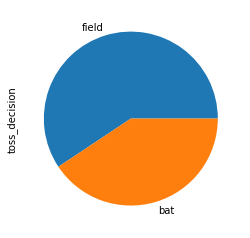

In [54]:
df.toss_decision.value_counts().plot(kind='pie')

#Teams who won toss and match

In [33]:
toss_winner = data['toss_winner'] == data['winner']
loss , win = toss_winner.groupby(toss_winner).size()
print(win)

357


#Higest number of matches won by teams in each season

In [34]:
dg=df
grouper = dg.groupby(['season','winner'])
l=[]
for name,group in grouper:
    l.append([name[0],name[1],group['winner'].count()])
df_g=pd.DataFrame(l,columns=['year','team','wins'])
print(df_g.loc[df_g['wins'] == df_g['wins'].max()])

    year              team  wins
6   2008  Rajasthan Royals    13
47  2013    Mumbai Indians    13


In [36]:
m=df_g.groupby('year')
for n , g in m:
    print(g.loc[g['wins'] == g['wins'].max()])
    print('\n')

   year              team  wins
6  2008  Rajasthan Royals    13


    year              team  wins
10  2009  Delhi Daredevils    10


    year            team  wins
21  2010  Mumbai Indians    11


    year                 team  wins
24  2011  Chennai Super Kings    11


    year                   team  wins
38  2012  Kolkata Knight Riders    12


    year            team  wins
47  2013  Mumbai Indians    13


    year             team  wins
54  2014  Kings XI Punjab    12


    year                 team  wins
60  2015  Chennai Super Kings    10
64  2015       Mumbai Indians    10


    year                 team  wins
75  2016  Sunrisers Hyderabad    11


    year            team  wins
80  2017  Mumbai Indians    12


    year                 team  wins
84  2018  Chennai Super Kings    11




#most number of matches win by the team

In [38]:
match_win = df.winner.value_counts()
match_win

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

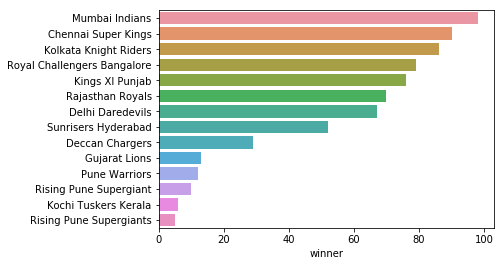

In [39]:
sns.barplot(y = match_win.index, x = match_win)

#most man of the match taken by player top 10

In [40]:
most_manofmatch=df.groupby('player_of_match')
top_10_manofmatch=most_manofmatch['player_of_match'].agg(['count']).sort_values(['count'], ascending=False).head(10)
top_10_manofmatch

,count
player_of_match,
CH Gayle,20
AB de Villiers,18
RG Sharma,16
YK Pathan,16
DA Warner,15
MS Dhoni,14
SK Raina,14
G Gambhir,13
SR Watson,13


#Matches played at various venus

In [42]:
matches_played_ven =df.venue.value_counts()
matches_played_ven

M Chinnaswamy Stadium                                   73
Eden Gardens                                            70
Feroz Shah Kotla                                        67
Wankhede Stadium                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  40
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

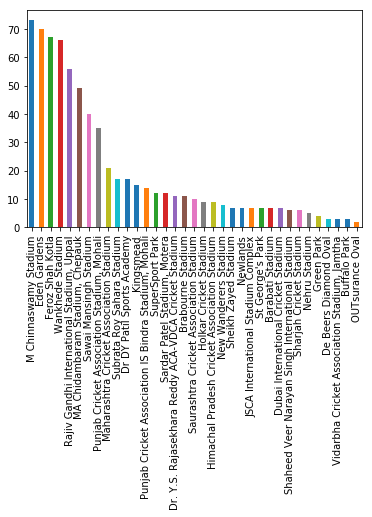

In [53]:
#sns.barplot(y = matches_played_ven.index, x = matches_played_ven)
df.venue.value_counts().plot(kind='bar')

#Team winning by maximum wickects

In [45]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                  2017-04-07 00:00:00
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
Name: 2, dtype: object

#Team wining by maximum runs

In [47]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmax()]

id                                  44
season                            2017
city                             Delhi
date               2017-05-06 00:00:00
team1                   Mumbai Indians
team2                 Delhi Daredevils
toss_winner           Delhi Daredevils
toss_decision                    field
result                          normal
dl_applied                           0
winner                  Mumbai Indians
win_by_runs                        146
win_by_wickets                       0
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
Name: 43, dtype: object

#Matches in which duckworth lewis method applyed

In [49]:
non_dl,dl = df.dl_applied.value_counts()
dl

19

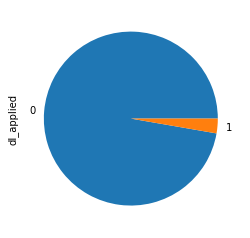

In [50]:
df.dl_applied.value_counts().plot(kind='pie')